In [1]:
import gym
import numpy as np
import pandas as pd
from sac_torch import Agent
from gym import wrappers
import matplotlib.pyplot as plt

In [2]:
# create an environment and an agent
env = gym.make('MsPacman-ram-v0')
agent = Agent(input_dims=env.observation_space.shape, env=env,
        n_actions=1)

# define number of games
n_games = 100

# record video of the agent playing the game
#env = wrappers.Monitor(env, 'tmp/video', video_callable=lambda episode_id: True, force=True)

# make lists for recording results
best_score = env.reward_range[0]
load_checkpoint = False
episodes = []
scores = []
avg_scores = []

In [3]:
if load_checkpoint:
    agent.load_models()
    env.render(mode='human')

for i in range(n_games):
    observation = env.reset()
    done = False
    score = 0
    while not done:
        action = agent.choose_action(observation)
        observation_, reward, done, info = env.step(action)
        score += reward
        agent.remember(observation, action, reward, observation_, done)
        if not load_checkpoint:
            agent.learn()
        observation = observation_
    
    # record the result
    episodes.append(i)
    scores.append(score)
    avg_score = np.mean(scores[-100:])
    avg_scores.append(avg_score)    
    
    # update the best score
    if avg_score > best_score:
        best_score = avg_score
        if not load_checkpoint:
            agent.save_models()

    print('episode', i, 'done')


print('all done')

.... saving models ....
episode 0 done
episode 1 done
.... saving models ....
episode 2 done
.... saving models ....
episode 3 done
episode 4 done
episode 5 done
.... saving models ....
episode 6 done
episode 7 done
.... saving models ....
episode 8 done
.... saving models ....
episode 9 done
episode 10 done
.... saving models ....
episode 11 done
episode 12 done
episode 13 done
episode 14 done
episode 15 done
episode 16 done
episode 17 done
episode 18 done
.... saving models ....
episode 19 done
episode 20 done
episode 21 done
.... saving models ....
episode 22 done
episode 23 done
episode 24 done
episode 25 done
episode 26 done
.... saving models ....
episode 27 done
episode 28 done
episode 29 done
episode 30 done
episode 31 done
episode 32 done
episode 33 done
episode 34 done
episode 35 done
episode 36 done
episode 37 done
episode 38 done
episode 39 done
episode 40 done
episode 41 done
episode 42 done
episode 43 done
episode 44 done
episode 45 done
episode 46 done
.... saving models

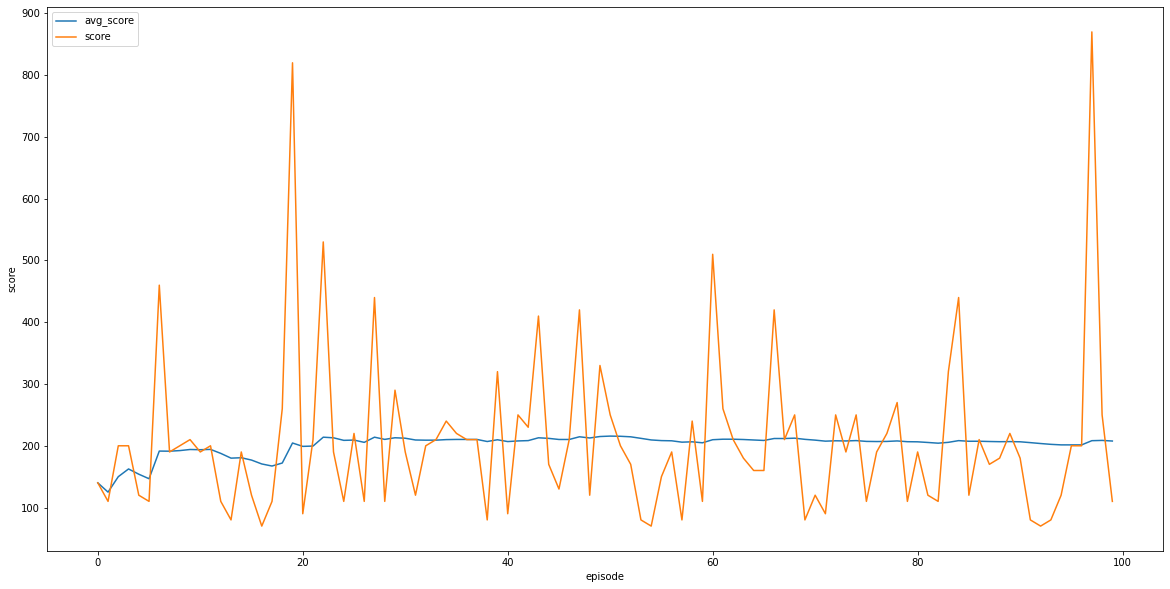

In [7]:
df = pd.DataFrame({'episode':episodes,'score':scores,'avg_score':avg_scores})
plt.figure(figsize=(20,10))
plt.plot(df['episode'],df['avg_score'], label='avg_score')
plt.plot(df['episode'],df['score'], label='score')
plt.xlabel('episode')
plt.ylabel('score')
plt.legend()
plt.show()

In [8]:
df

,episode,score,avg_score
0,0,140.0,140.000000
1,1,110.0,125.000000
2,2,200.0,150.000000
3,3,200.0,162.500000
4,4,120.0,154.000000
...,...,...,...
95,95,200.0,201.458333
96,96,200.0,201.443299
97,97,870.0,208.265306
98,98,250.0,208.686869


In [11]:
# make lists for restoring results
grid_scores = []
alpha = []
beta = []

# grid search
for a in [0.01,0.03]:
    for b in [0.01,0.03]:

        # create an environment and an agent
        env = gym.make('MsPacman-ram-v0')
        agent = Agent(input_dims=env.observation_space.shape, env=env,
                n_actions=1, alpha=a, beta=b)

        # define number of games
        n_games = 10

        # make lists for recording results
        best_score = env.reward_range[0]
        load_checkpoint = False
        scores = []
        avg_scores = []

        if load_checkpoint:
            agent.load_models()
            env.render(mode='human')

        for i in range(n_games):
            observation = env.reset()
            done = False
            score = 0
            while not done:
                action = agent.choose_action(observation)
                observation_, reward, done, info = env.step(action)
                score += reward
                agent.remember(observation, action, reward, observation_, done)
                if not load_checkpoint:
                    agent.learn()
                observation = observation_

            # record the result
            scores.append(score)
            avg_score = np.mean(scores[-100:])
            avg_scores.append(avg_score)    

            # update the best score
            if avg_score > best_score:
                best_score = avg_score
                if not load_checkpoint:
                    agent.save_models()
            
            print('episode', i, 'done')  
            
        alpha.append(a)
        beta.append(b)
        grid_scores.append(avg_scores[-1])
        print('alpha',a,'beta',b,'done')

.... saving models ....
episode 0 done
.... saving models ....
episode 1 done
.... saving models ....
episode 2 done
episode 3 done
.... saving models ....
episode 4 done
episode 5 done
.... saving models ....
episode 6 done
.... saving models ....
episode 7 done
episode 8 done
episode 9 done
alpha 0.01 beta 0.01 done
.... saving models ....
episode 0 done
episode 1 done
episode 2 done
episode 3 done
episode 4 done
episode 5 done
episode 6 done
episode 7 done
episode 8 done
episode 9 done
alpha 0.01 beta 0.03 done
.... saving models ....
episode 0 done
episode 1 done
episode 2 done
episode 3 done
episode 4 done
episode 5 done
episode 6 done
episode 7 done
episode 8 done
episode 9 done
alpha 0.03 beta 0.01 done
.... saving models ....
episode 0 done
episode 1 done
episode 2 done
episode 3 done
episode 4 done
episode 5 done
episode 6 done
.... saving models ....
episode 7 done
episode 8 done
.... saving models ....
episode 9 done
alpha 0.03 beta 0.03 done


In [12]:
result = pd.DataFrame({'avg_scores':grid_scores,'alpha':alpha,'beta':beta})
result

,avg_scores,alpha,beta
0,588.0,0.01,0.01
1,348.0,0.01,0.03
2,424.0,0.03,0.01
3,240.0,0.03,0.03
